<a href="https://colab.research.google.com/github/hdonghun/DataScience/blob/main/Marketing_Department_Skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: Marketing_Department 부서에서의 데이터 분석

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

분석 과정: 

데이터 가공

EDA

분류하기 위해 K-mean 이용

거기에 맞는 최적의 파라미터를 찾기 위해 elbow method사용

주성분 분석 (PCA) 차원축소

데이터 시각화

오토인코더


# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
# You will need to mount your drive using the following commands:
# For more information regarding mounting, please check this out: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
creditcard_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Marketing_data.csv')
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
# 전체 컬럼에 대한 mean 확인하기
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
# 현금서비스를 가장 많이 받는 고객 데이터를 확인하기.
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [ ]:
creditcard_df[creditcard_df['CASH_ADVANCE']==47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# TASK #3: VISUALIZE AND EXPLORE DATASET

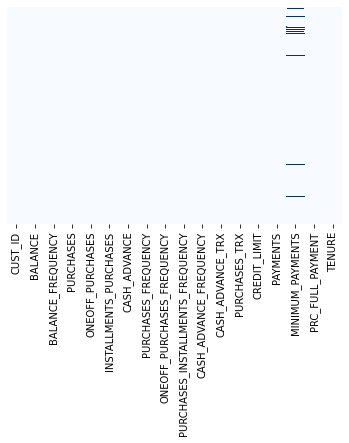

In [ ]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull(), yticklabels=False, cbar = False, cmap ='Blues')
# 최소 지불 금액에 결측치들이 조금 있다

In [ ]:
creditcard_df.isnull().sum()

# MINIMUM_PAYMENTS 최소 지불 금액 항목에 313개의 결측치가 있다.
# Credit_Limit에는 하나의 결측치가 있다.

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
creditcard_df.iloc[0]

CUST_ID                                 C10001
BALANCE                              40.900749
BALANCE_FREQUENCY                     0.818182
PURCHASES                                 95.4
ONEOFF_PURCHASES                           0.0
INSTALLMENTS_PURCHASES                    95.4
CASH_ADVANCE                               0.0
PURCHASES_FREQUENCY                   0.166667
ONEOFF_PURCHASES_FREQUENCY                 0.0
PURCHASES_INSTALLMENTS_FREQUENCY      0.083333
CASH_ADVANCE_FREQUENCY                     0.0
CASH_ADVANCE_TRX                             0
PURCHASES_TRX                                2
CREDIT_LIMIT                            1000.0
PAYMENTS                            201.802084
MINIMUM_PAYMENTS                    139.509787
PRC_FULL_PAYMENT                           0.0
TENURE                                      12
Name: 0, dtype: object

In [ ]:
creditcard_df.loc[0]

CUST_ID                                 C10001
BALANCE                              40.900749
BALANCE_FREQUENCY                     0.818182
PURCHASES                                 95.4
ONEOFF_PURCHASES                           0.0
INSTALLMENTS_PURCHASES                    95.4
CASH_ADVANCE                               0.0
PURCHASES_FREQUENCY                   0.166667
ONEOFF_PURCHASES_FREQUENCY                 0.0
PURCHASES_INSTALLMENTS_FREQUENCY      0.083333
CASH_ADVANCE_FREQUENCY                     0.0
CASH_ADVANCE_TRX                             0
PURCHASES_TRX                                2
CREDIT_LIMIT                            1000.0
PAYMENTS                            201.802084
MINIMUM_PAYMENTS                    139.509787
PRC_FULL_PAYMENT                           0.0
TENURE                                      12
Name: 0, dtype: object

In [ ]:
# 결측치가 있는 항목의 평균값을 이용하여, 결측치를 채워 넣기 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()==True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# 중복값 확인하기
creditcard_df.duplicated().sum()

0

In [ ]:
# 의미가 없는 컬럼 없에기
creditcard_df.drop('CUST_ID', axis=1, inplace=True)

In [ ]:
creditcard_df.head(3)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.0,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12


In [ ]:
# 길이 구하기
n = len(creditcard_df.columns)
n

17

In [ ]:
# 모든 컬럼의 이름 나타내기
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

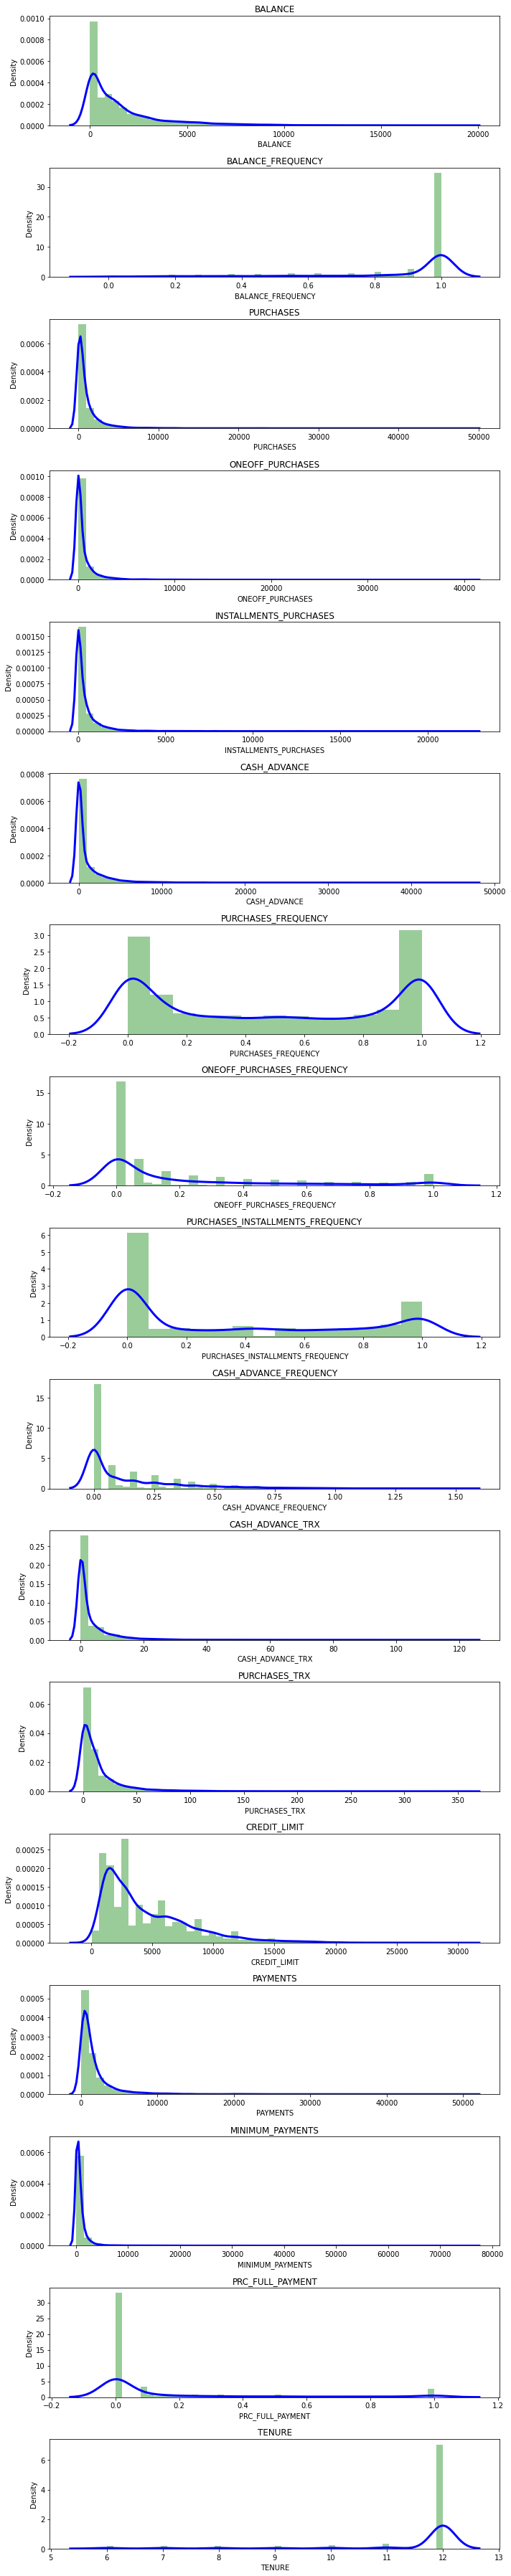

In [ ]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

# KDE plot를 사용하여, 커널 밀도 추정치 나타내기
# 연속형 변수의 확률 밀도

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={'color':'b', 'lw':3, 'label':'KDE'}, hist_kws={'color':'g'})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()



In [ ]:
# sns.pairplot(creditcard_df)
# Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES 
# Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'
# 상관관계 살펴보기
correlations = creditcard_df.corr()
correlations

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


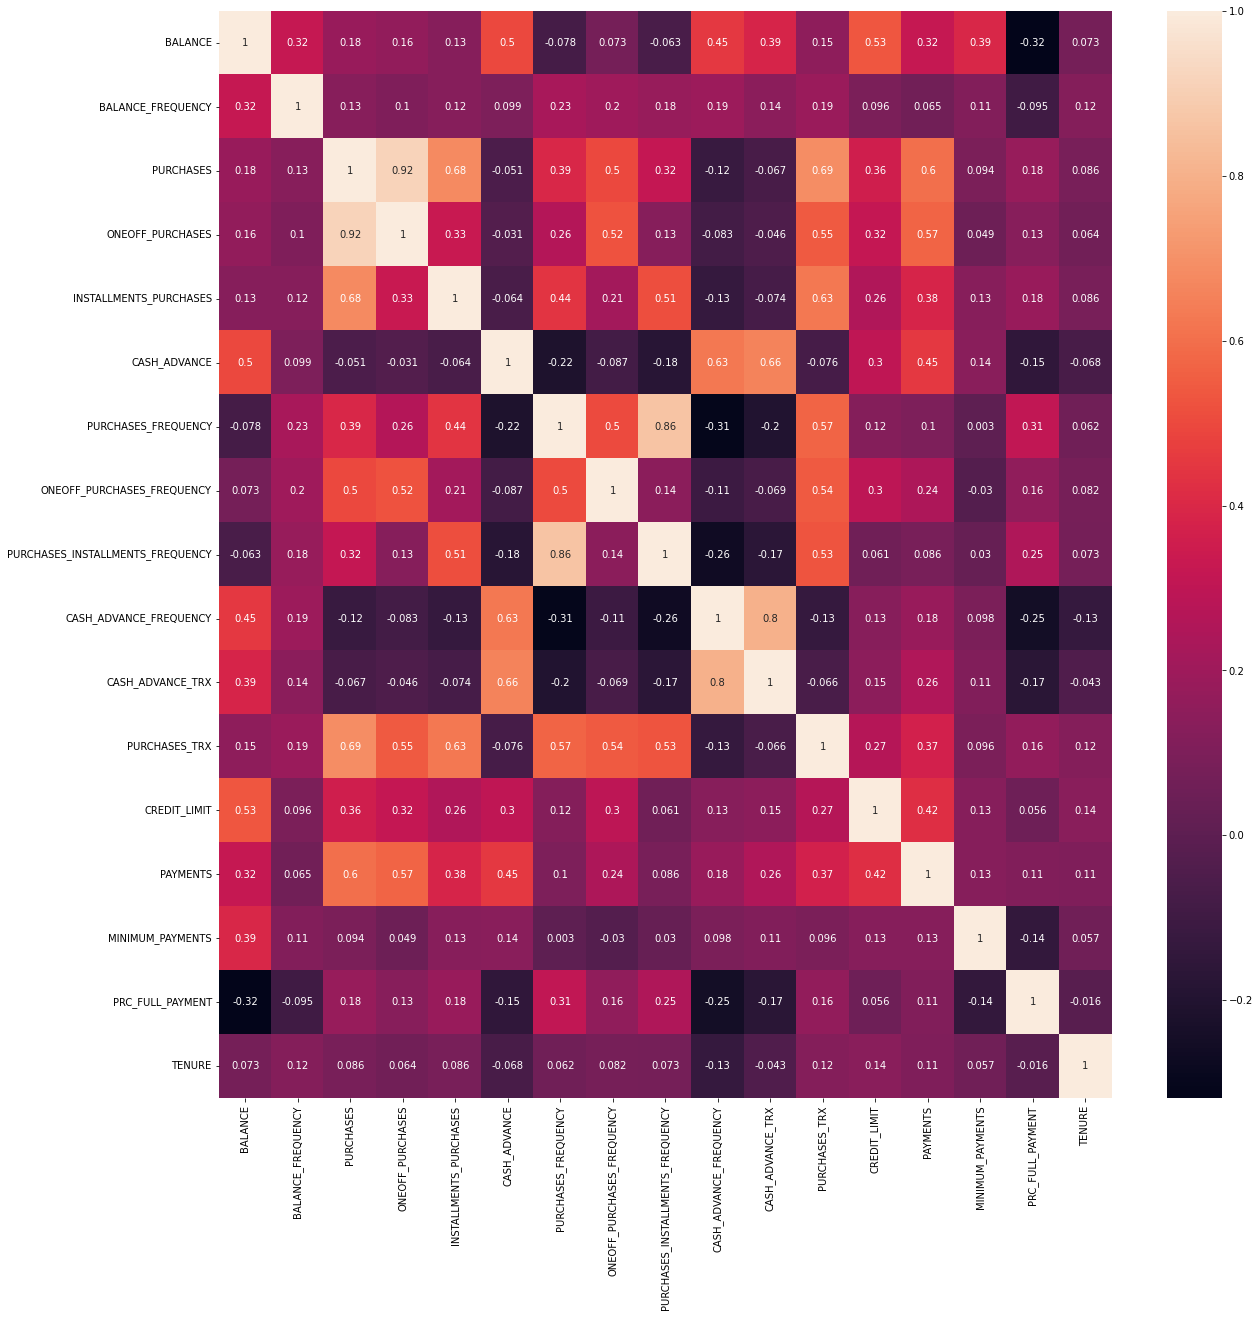

In [ ]:
# 히트맵으로 상관관계 살펴보기
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)
# 강한 정적 상관관계 확인하기.
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

# TASK #4: UNDERSTAND THE THEORY AND INTUITON BEHIND K-MEANS

##K-MEANS (K 평균 알고리즘)
모집단 또는 범주에 대한 사전 정보가 없을 때, 주어진 관측값들 사이의 거리를 측정함으로써 유사성을 이용해서 분석(군집화). 또한, 전체 데이터를 여러 개의 집단으로 그룹화하는데, 이는 각 집단의 성격을 파악하며 데이터 전체 구조를 이해하기 위함이다.

In [ ]:
# elbow Method를 통해, 최적의 파라미터 K를 구하기
# 이것을 활용하기 위해서, Within Cluster Sum of Squares(WCSS)을 구해야 한다.(군집 내 제곱의 합)
# 각 데이터들의 좌표들과 중심점의 거리를 계산
# 각 Pi들 끼리의 거리 또한 계산한다.
# Pi와 C1까지의 거리를 계산하고, 제곱한 후 또 다른 Pi와 C1과의 거리를 계산해서 제곱한 후 각 데이터마다 계산한 제곱 값을 모두 더해줍니다.
# 이렇게 하면 첫번째 군집1의 값이 구해진다.
# 즉, 최적의 K 값(군집의 수)을 얻어냄으로써 최적화를 통한 최상의 결과를 얻게 된다.

# TASK #5: FIND THE OPTIMAL NUMBER OF CLUSTERS USING ELBOW METHOD
# elbow 메서드 사용!!
- 팔꿈치 방법은 데이터 집합에서 적절한 수의 클러스터를 찾는 데 도움이 되도록 설계된 클러스터 분석 내에서 일관성을 해석하고 검증하는 휴리스틱 방법입니다.
- 꺾은선형 차트가 팔처럼 보이면 팔의 "팔꿈치"가 가장 좋은 k 값입니다.

In [ ]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [ ]:
creditcard_df.shape
# 대략 9,000행, 17개의 features

(8950, 17)

In [ ]:
# 알고리즘을 사용하기 전에 데이터스케일링은 필수적인것!
creditcard_df_scaled

#데이터스케일링에 대한 개념 더 공부 필수

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
# elbow method 적용하기
scores_1 = []
# 20번 반복해서 scores_1에 데이터 저장
range_values = range(1,20)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)


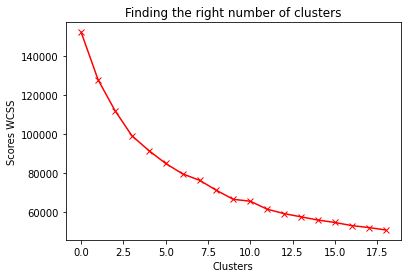

In [ ]:
plt.plot(scores_1, 'rx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores WCSS')
plt.show()

# 7 ~10 까지의 구간에서 변화가 적게 나타난다고 보여진다.( 사람에 따라 다름.)

# TASK #6: APPLY K-MEANS METHOD

In [ ]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
labels

array([5, 1, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_.shape         

(8, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])

In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

# First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance ($104) and cash advance ($303), Percentage of full payment = 23%
# Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance ($5000) and cash advance (~$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
# Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
# Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
1,5077.583910,0.971147,535.046475,330.907834,204.255772,5204.313921,0.298070,0.138374,0.199390,0.519939,16.472350,8.056452,8219.360075,4069.481486,2158.566589,0.038094,11.611751
2,1224.822773,0.970123,1972.934060,1577.343759,395.590301,283.065648,0.868945,0.762541,0.400265,0.053974,1.052007,27.760036,5857.004811,1987.794057,486.500268,0.272315,11.867701
3,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
4,105.494632,0.369494,338.310626,200.913113,137.648613,308.067290,0.266937,0.069661,0.189780,0.030936,0.681895,4.276650,3858.578210,1176.975090,266.534101,0.236510,11.784264
5,1597.935110,0.972974,232.524002,183.260924,49.444618,787.638396,0.144262,0.080374,0.064779,0.156602,3.067131,2.648569,3387.570311,1010.570993,839.735471,0.020077,11.882245
6,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1893.464949,0.242857,11.964539
7,804.200469,0.956153,925.179376,186.717184,738.908163,213.555043,0.890181,0.086676,0.846204,0.039888,0.779830,19.422866,3539.301149,1105.966467,790.857405,0.246979,11.861208


In [ ]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
1,5077.583910,0.971147,535.046475,330.907834,204.255772,5204.313921,0.298070,0.138374,0.199390,0.519939,16.472350,8.056452,8219.360075,4069.481486,2158.566589,0.038094,11.611751
2,1224.822773,0.970123,1972.934060,1577.343759,395.590301,283.065648,0.868945,0.762541,0.400265,0.053974,1.052007,27.760036,5857.004811,1987.794057,486.500268,0.272315,11.867701
3,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
4,105.494632,0.369494,338.310626,200.913113,137.648613,308.067290,0.266937,0.069661,0.189780,0.030936,0.681895,4.276650,3858.578210,1176.975090,266.534101,0.236510,11.784264
5,1597.935110,0.972974,232.524002,183.260924,49.444618,787.638396,0.144262,0.080374,0.064779,0.156602,3.067131,2.648569,3387.570311,1010.570993,839.735471,0.020077,11.882245
6,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1893.464949,0.242857,11.964539
7,804.200469,0.956153,925.179376,186.717184,738.908163,213.555043,0.890181,0.086676,0.846204,0.039888,0.779830,19.422866,3539.301149,1105.966467,790.857405,0.246979,11.861208


In [ ]:
labels.shape

(8950,)

In [ ]:
labels.max()
# 8개의 군집을 가지고 있으니, 0부터 7까지가 된다

7

In [ ]:
labels.min()

0

In [ ]:
creditcard_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [ ]:
# 각 인덱스에 있는 데이터가 어디 군집에 속하는지 표현해주기 위해서, 가장 오른쪽에 어느 군집인지를 나타내주는 새로운 컬럼 추가하기
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis =1)
creditcard_df_cluster.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


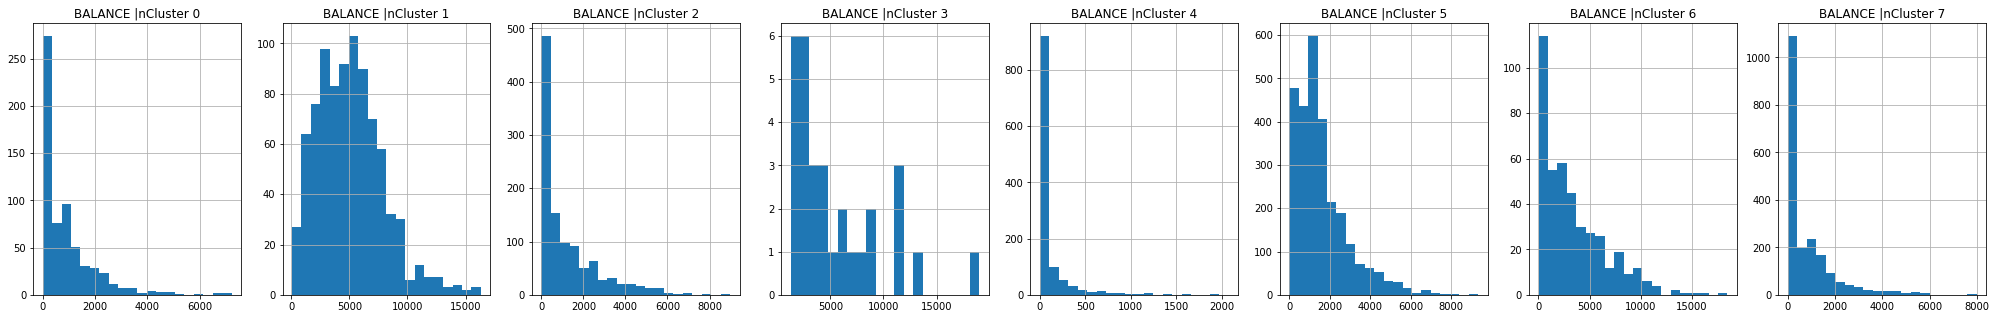

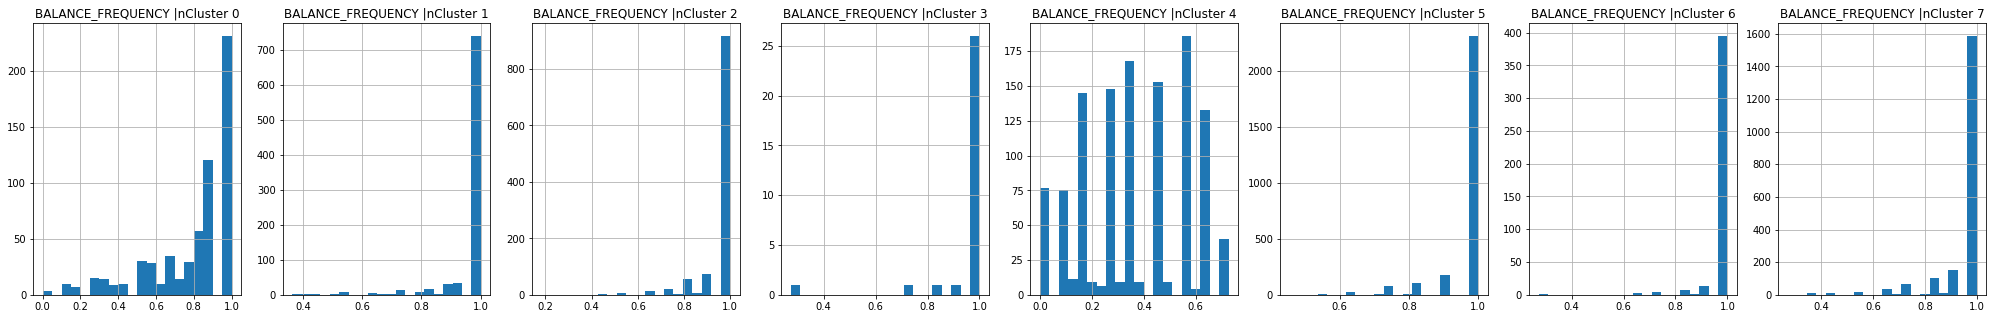

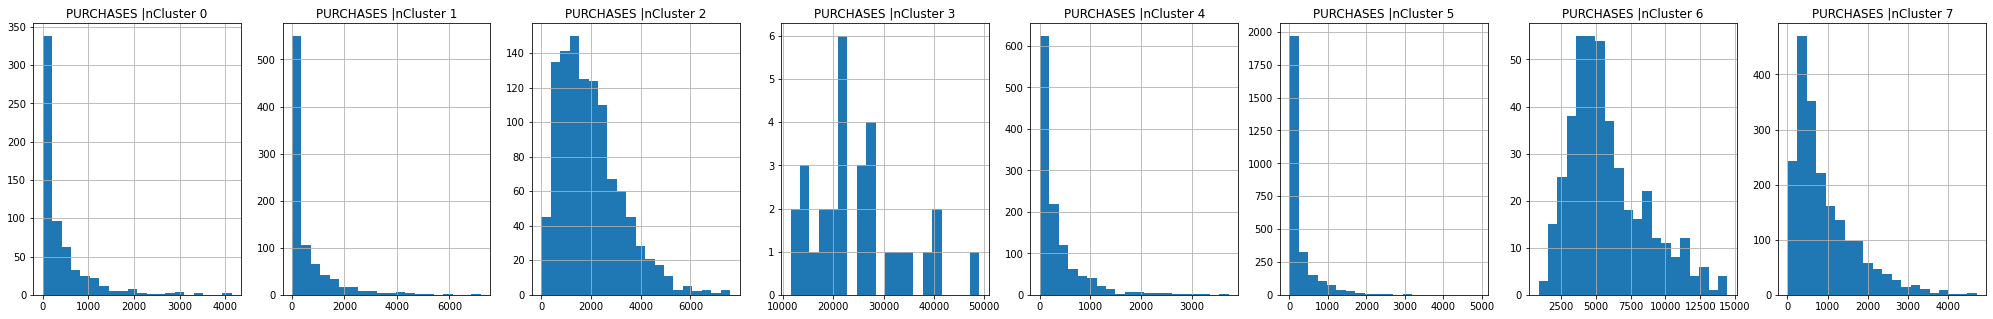

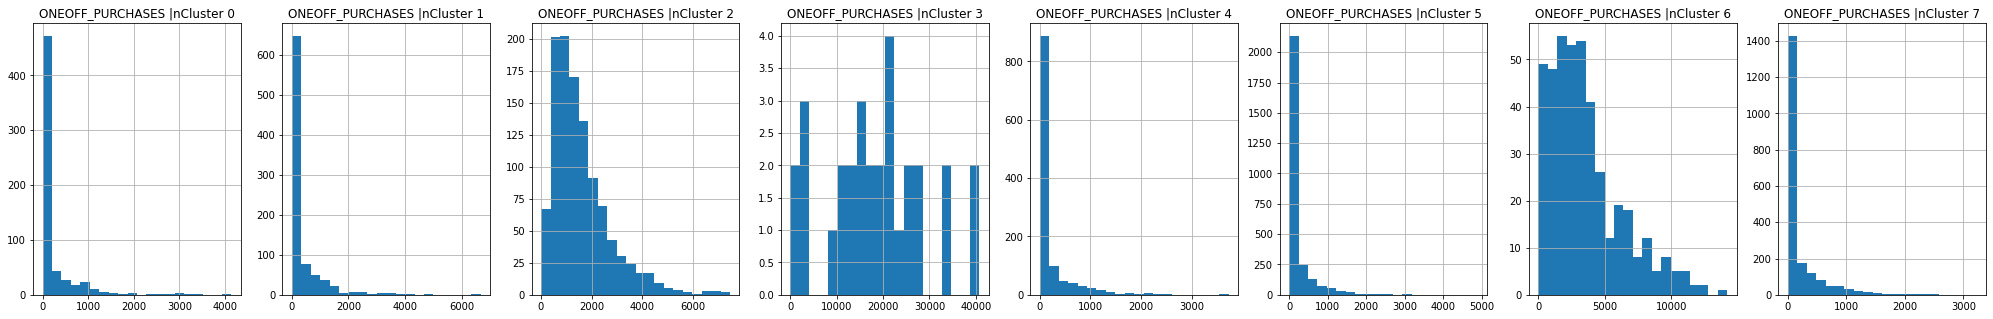

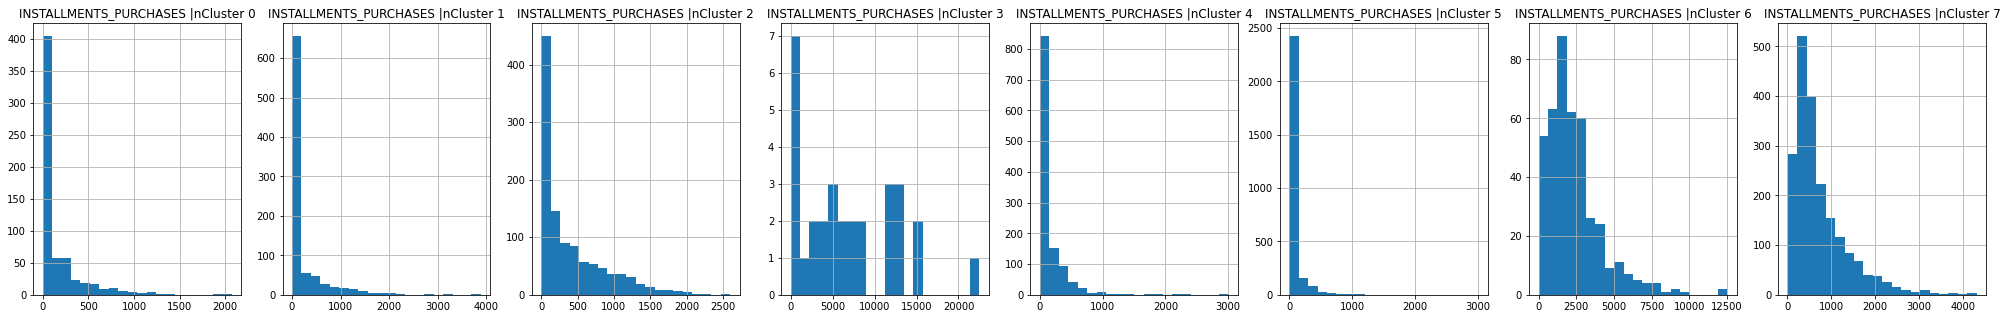

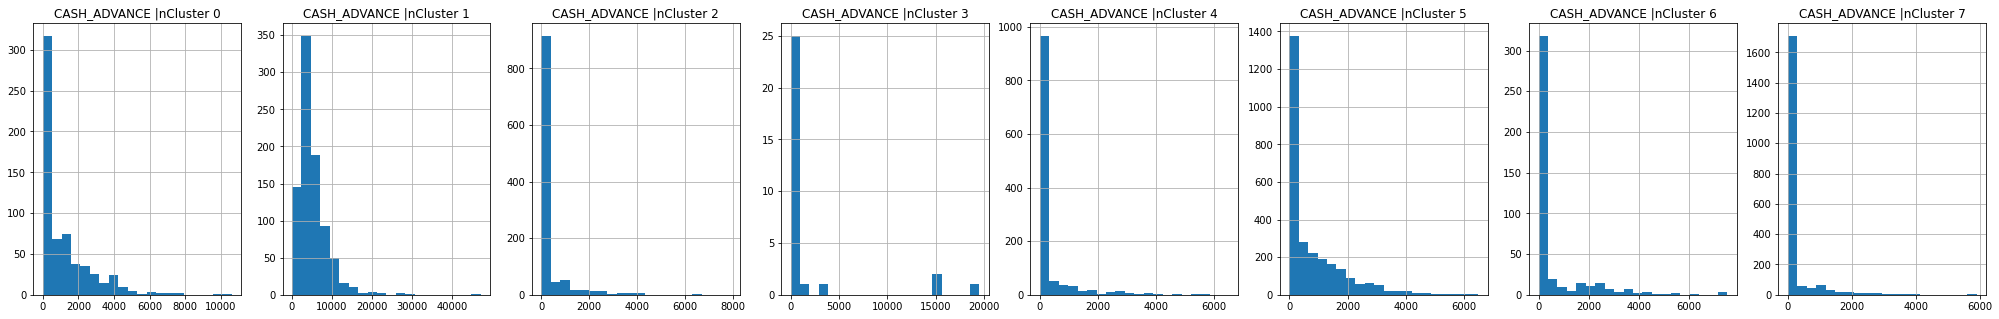

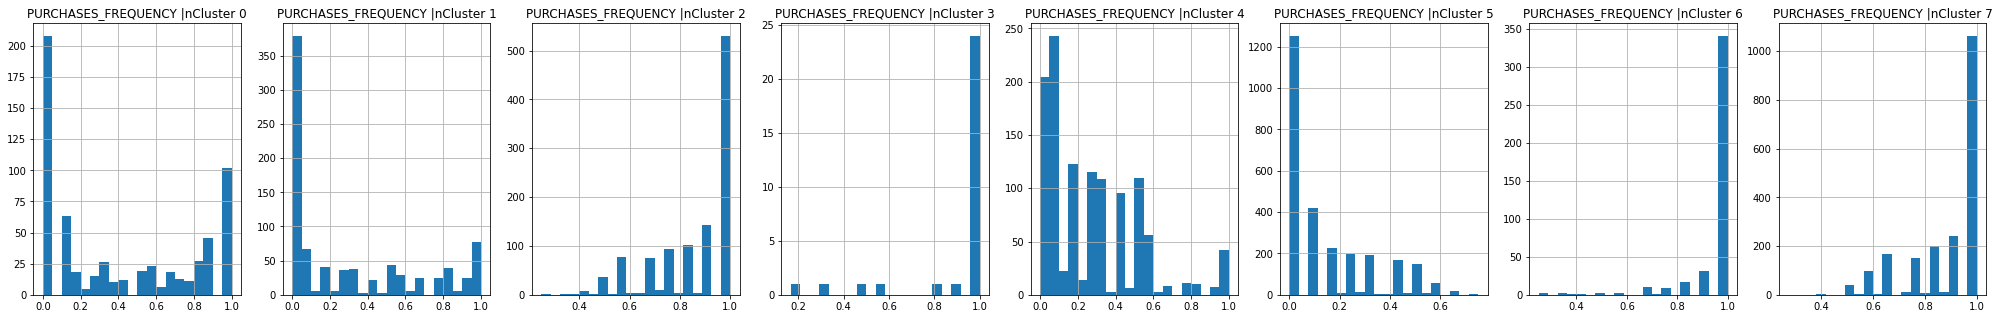

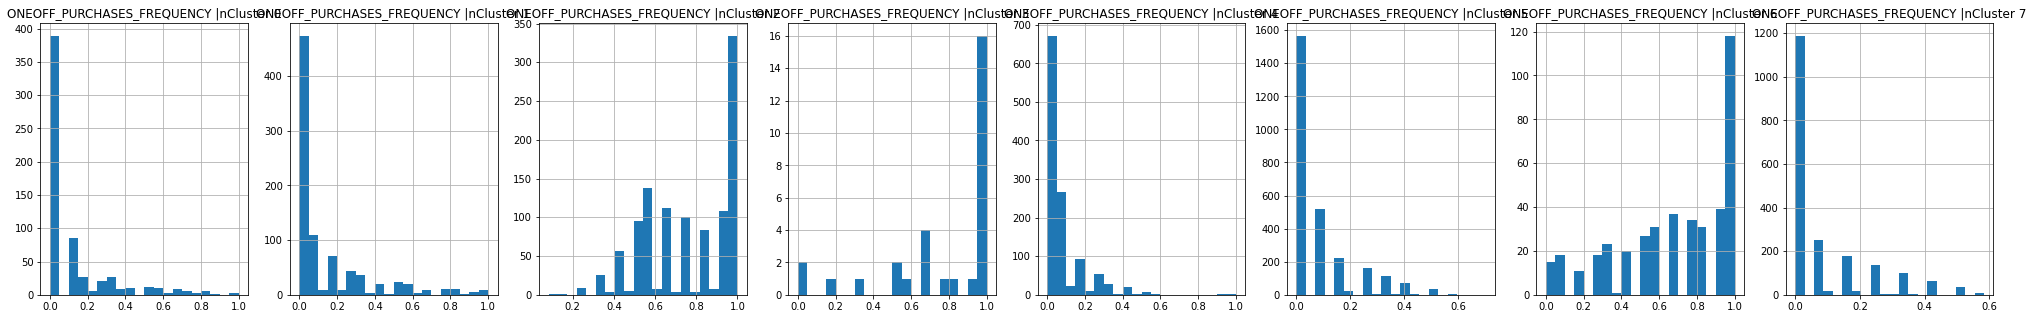

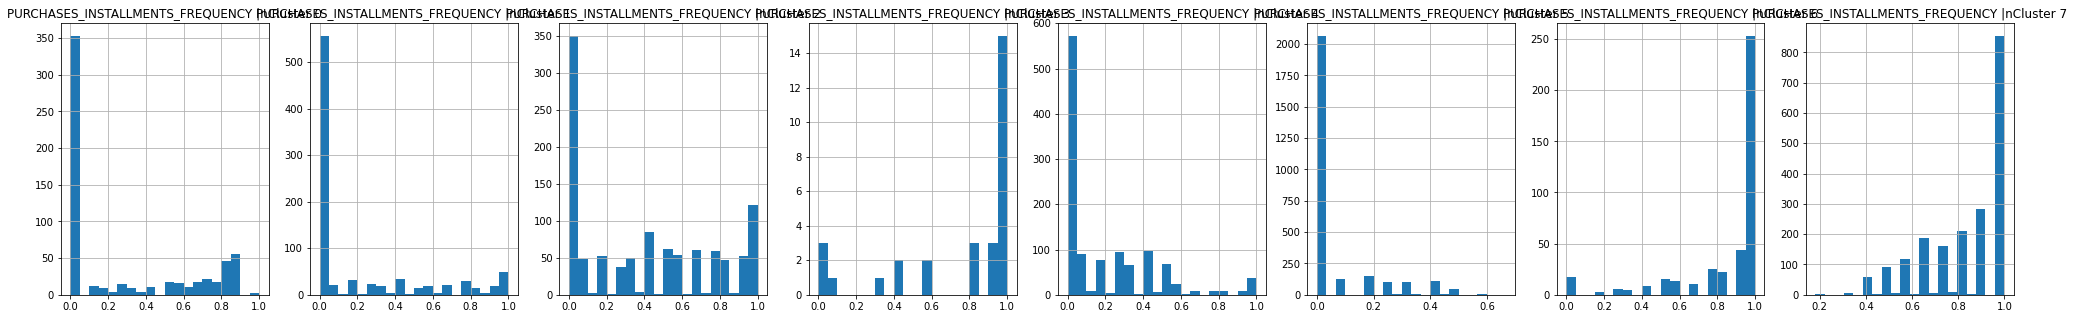

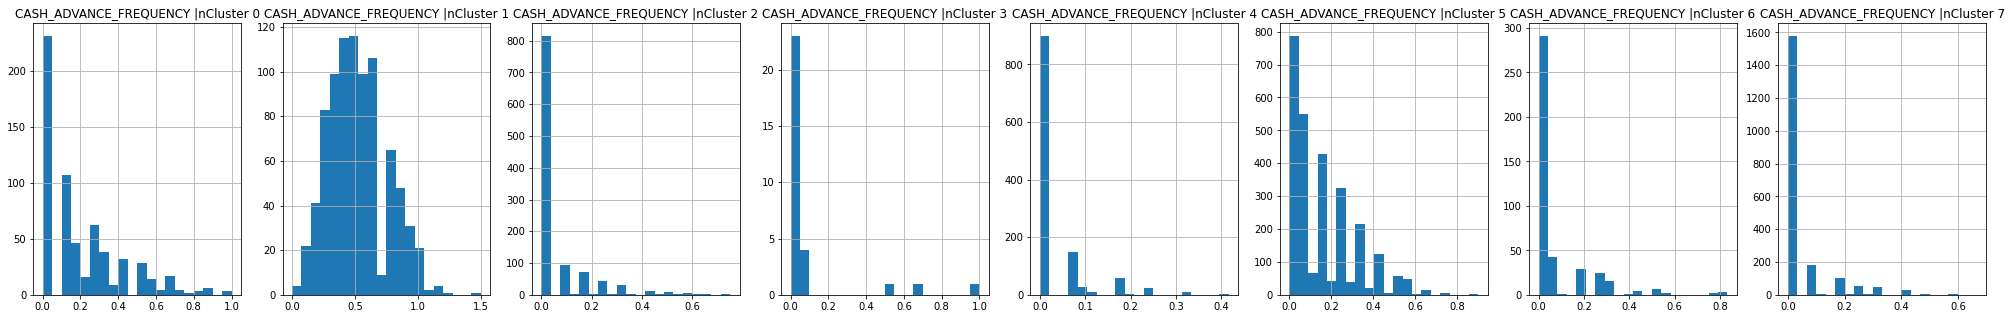

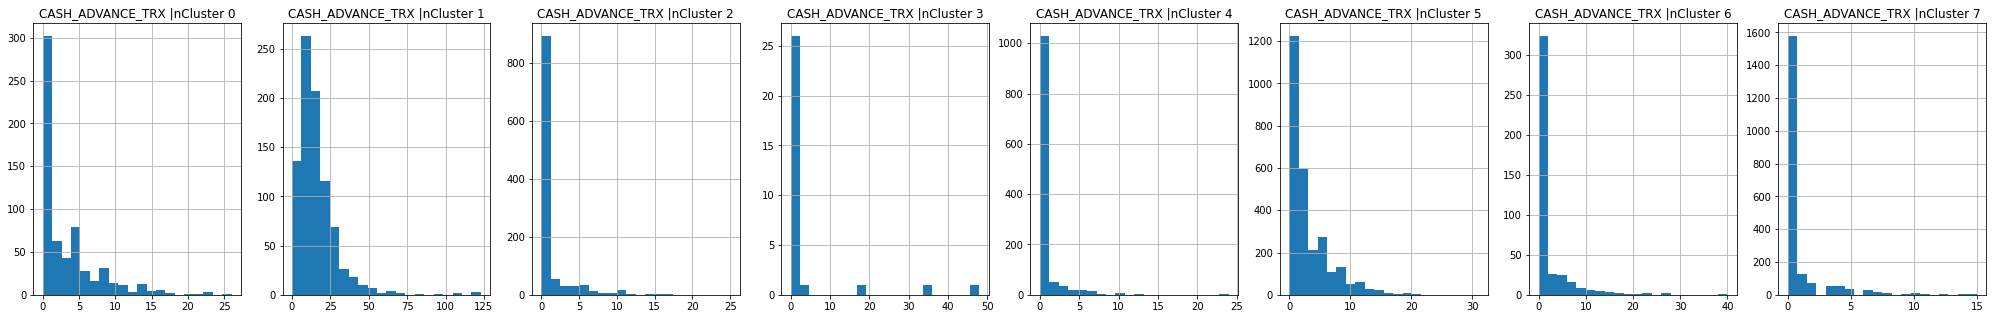

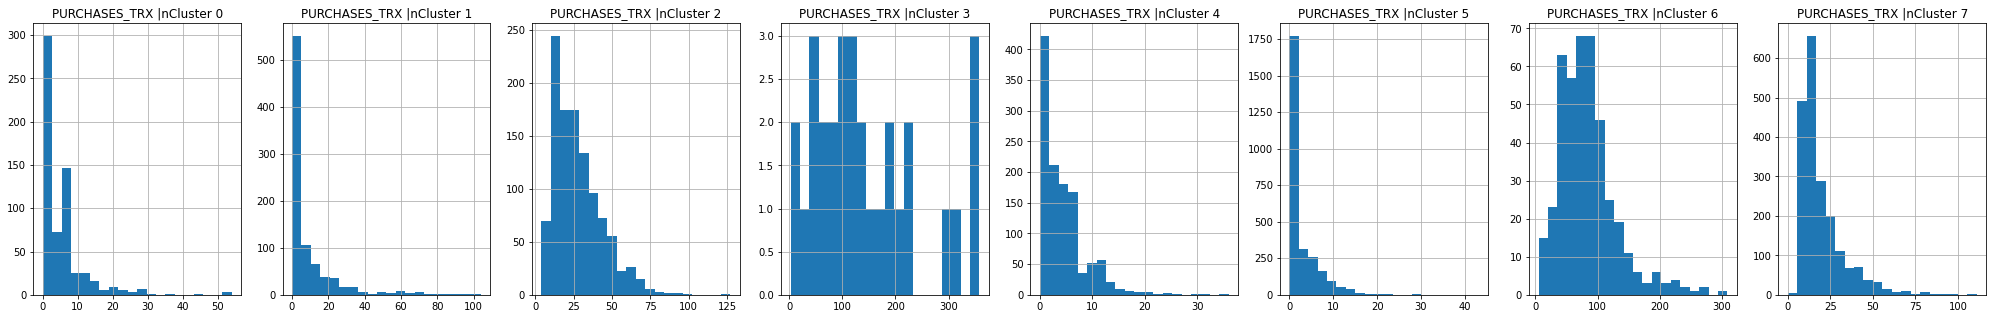

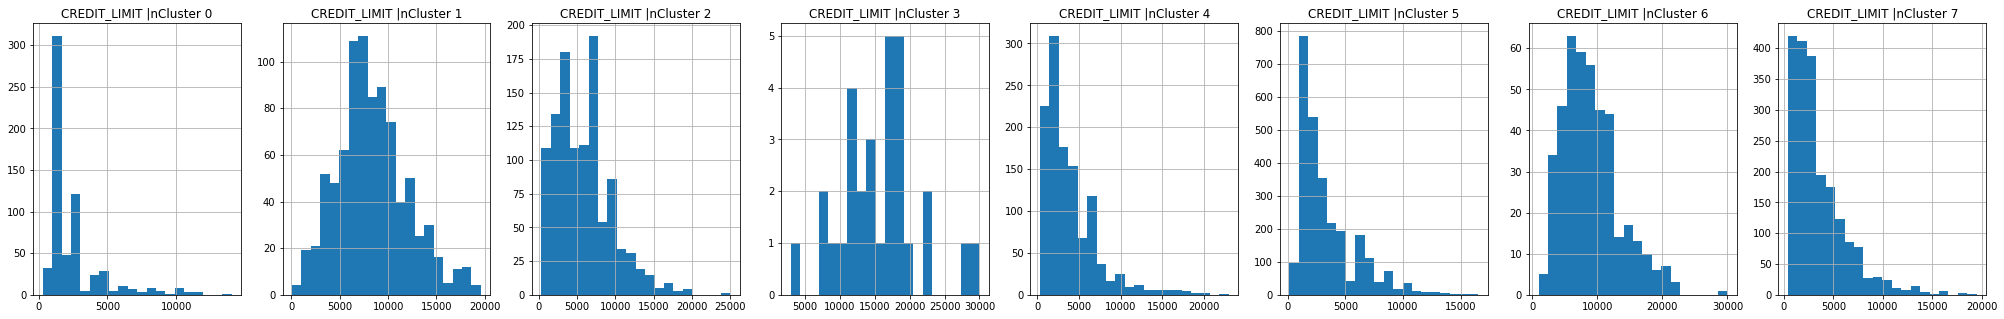

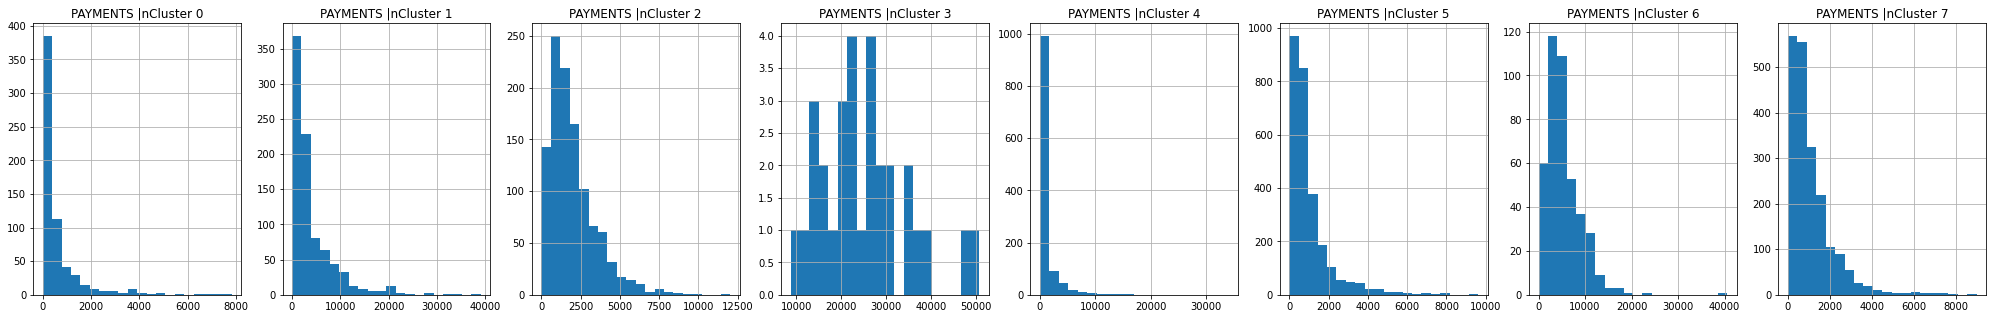

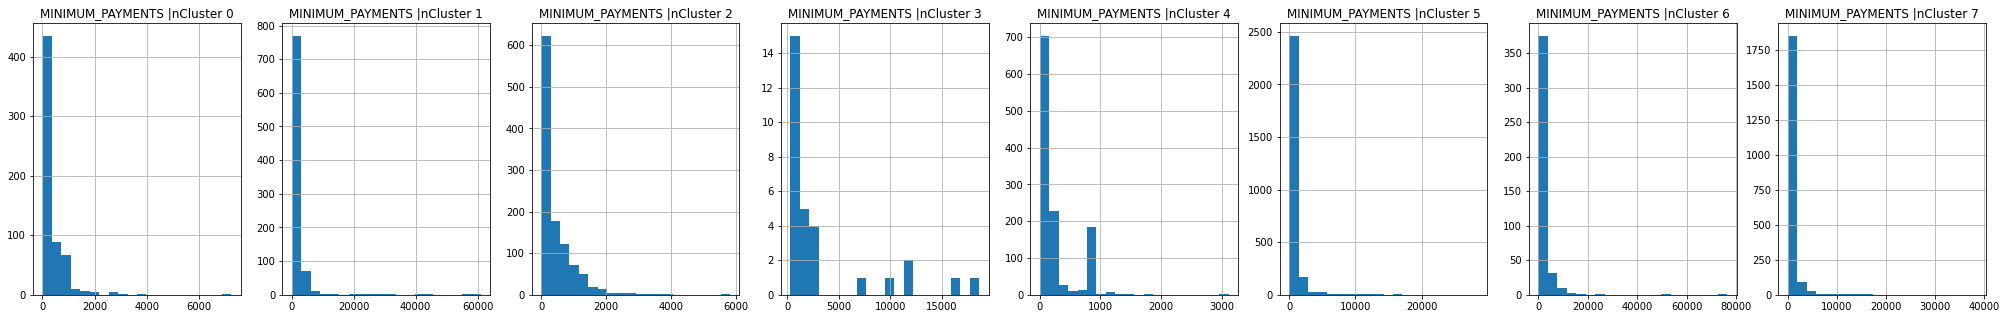

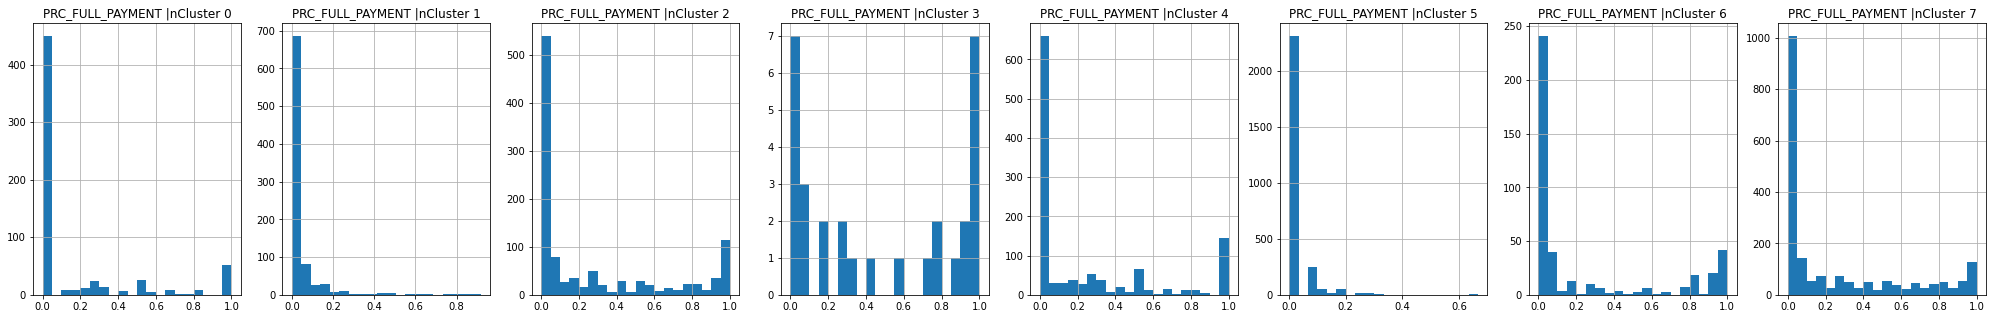

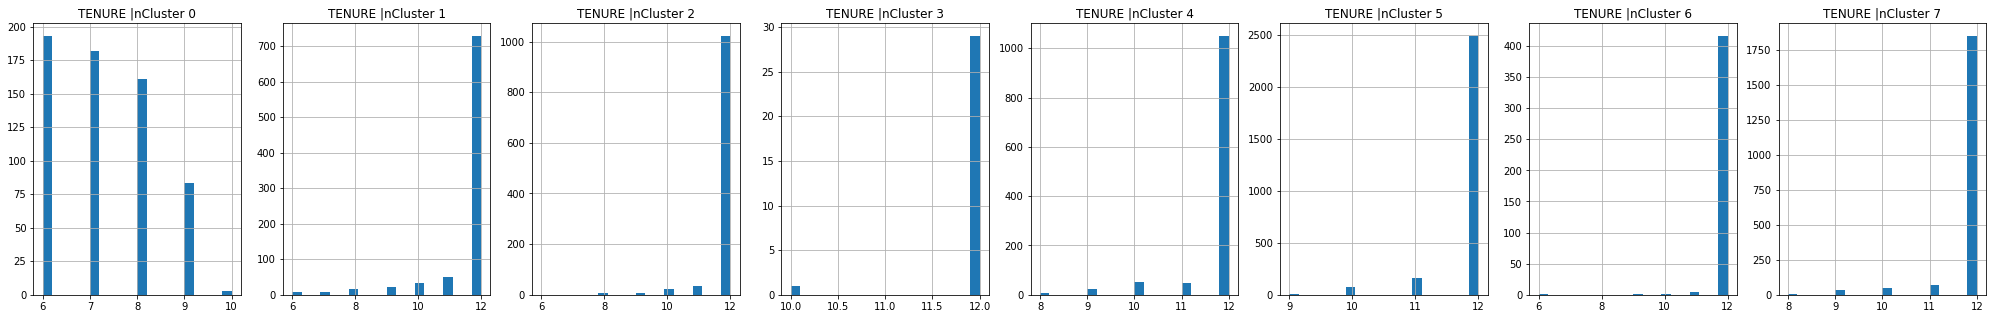

In [ ]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster']==j]
    cluster[i].hist(bins = 20)
    plt.title('{} |nCluster {}'.format(i,j))

plt.show()

# TASK 7: APPLY PRINCIPAL COMPONENT ANALYSIS AND VISUALIZE THE RESULTS
## 주성분 분석(PCA)을 적용하여, 차원축소를 수행, 데이터시각화.
정보를 잃지 않은 채로, 차원만 줄이도록 하는 방법.

주성분 분석을 사용하는 이유는 데이터가 가진 특성의 수가 지나치게 많을 때, 그 수를 적절하게 줄임으로써 얻는 이점이 있기 때문이다. 특성의 수를 줄일 대 우리는 크게 3가지 순기능을 기대해 볼 수 있다.
먼저 차원이 낮아지면 대상에 대한 이해가 보다 쉬워지게 된다. 공간보다는 면, 면보다는 선, 선보다는 점을 이해하는 것이 보다 용이한 것과 같은 맥락이다. 또한 연산속도가 개선된다는 점이다. 분산값을 유지하면서 정보의 크기 자체를 줄이기 때문에, 데이터의 특성을 훼손시키지 않고도 보다 빠른 연산을 기대할 수 있게 된다.
다중공선성 문제, 차원의 저주 문제를 해결할 수 있다.

![alt text](https://drive.google.com/uc?id=1xDuvEnbuNqIjX5Zng39TCfGCf-BBDGf0)

In [ ]:
# Obtain the principal components 
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

#성분의 수를 2개로 지정했기 때문에, 두 개의 열이 보인다.

array([[-1.68221953, -1.07645257],
       [-1.13829461,  2.50647134],
       [ 0.96968122, -0.38348447],
       ...,
       [-0.92620236, -1.81079256],
       [-2.33654982, -0.65798631],
       [-0.55642375, -0.40046692]])

In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()


,pca1,pca2
0,-1.682220,-1.076453
1,-1.138295,2.506471
2,0.969681,-0.383484
3,-0.873628,0.043184
4,-1.599433,-0.688590


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()


,pca1,pca2,cluster
0,-1.682220,-1.076453,5
1,-1.138295,2.506471,1
2,0.969681,-0.383484,2
3,-0.873628,0.043184,5
4,-1.599433,-0.688590,5


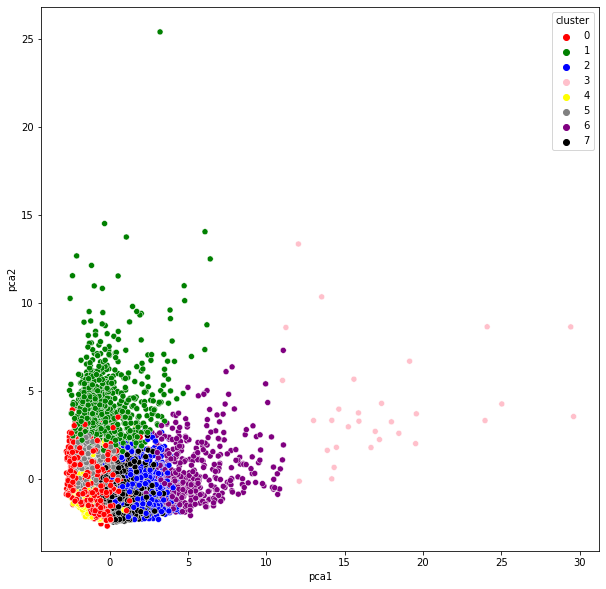

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1',y='pca2',hue='cluster', data = pca_df, palette=['red','green','blue','pink','yellow','gray','purple','black'])
# hue는 k-평균 알고리즘을 사용해 얻은 것들.

# TASK #8: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

오토인코더: 파이프라인의 중간에 병목(네트워크가 인풋을 압축시켜 인코딩되도록 강제하는 역할이다)을 만들어, 인풋데이터와 똑같은 아웃풋 데이터를 재구성해내는 것. (오토인코더를 훈련시킬 떄는 실제로 동일한 인풋과 동일한 아웃풋 데이터를 사용한다.) (차원을 축소하고 압축하면서 정보가 소실되지 않도록 하는것, 즉 용량을 줄이는 것, 그리고 코드층에 다다르면, 이 데이터를 다시 업샘플링 하여 이미지를 동일하게 재구성해낸다.) 



![alt text](https://drive.google.com/uc?id=1g0tWKogvKaCrtsfzjApi6m8yGD3boy4x)

![alt text](https://drive.google.com/uc?id=1AcyUL_F9zAD2--Hmyq9yTkcA9mC6-bwg)

![alt text](https://drive.google.com/uc?id=1xk1D5uldId0DWywRJ3-OAVBcIr5NGCq_)

# TASK #9: APPLY AUTOENCODERS (PERFORM DIMENSIONALITY REDUCTION USING AUTOENCODERS)

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

In [ ]:
input_df = Input(shape =(17,))  # 17개의 특성을 인코더 버전으로 처리한다는 것.
# 인코드 네트워크 빌드하기
x = Dense(7, activation='relu')(input_df) #첫번째 층
x = Dense(500, activation='relu', kernel_initializer= 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer= 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer= 'glorot_uniform')(x)
#인코딩된 층 만들기
encoded = Dense(10, activation='relu', kernel_initializer='glorot_uniform')(x)

# 디코더 네트워크 빌드하기
x = Dense(2000, activation='relu', kernel_initializer= 'glorot_uniform')(encoded) # 인코딩의 반대순서라고 보면 된다.
x = Dense(500, activation='relu', kernel_initializer= 'glorot_uniform')(x)
#디코딩된 층 만들기
decoded = Dense(17, kernel_initializer='glorot_uniform')(x)

# 오토인코더 전체를 빌드하기 Autoencoder
autoencoder = Model(input_df, decoded) 

# Encoder 인코더네트워크 빌드하기
encoder = Model(input_df, encoded)

#모델을 컴파일하기
autoencoder.compile(optimizer = 'adam', loss ='mean_squared_error')



In [ ]:
creditcard_df_scaled.shape
# 17개의 특성(features)을 가지고 있음

(8950, 17)

In [ ]:
# 데이터 적용하기
# 오토인코드 방식은 비지도 학습이다. 인풋과 아웃풋이 같다
#
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size=128, epochs=25, verbose=1 )
# verbose  학습시킬 떄의 텍스트 양.

Epoch 1/25
70/70 [==============================] - 8s 104ms/step - loss: 0.5752
Epoch 2/25
70/70 [==============================] - 4s 62ms/step - loss: 0.3457
Epoch 3/25
70/70 [==============================] - 4s 52ms/step - loss: 0.2748
Epoch 4/25
70/70 [==============================] - 4s 52ms/step - loss: 0.2361
Epoch 5/25
70/70 [==============================] - 4s 52ms/step - loss: 0.2026
Epoch 6/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1933
Epoch 7/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1675
Epoch 8/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1511
Epoch 9/25
70/70 [==============================] - 4s 51ms/step - loss: 0.1490
Epoch 10/25
70/70 [==============================] - 4s 52ms/step - loss: 0.1374
Epoch 11/25
70/70 [==============================] - 4s 51ms/step - loss: 0.1341
Epoch 12/25
70/70 [==============================] - 4s 56ms/step - loss: 0.1276
Epoch 13/25
70/70 [=================

In [ ]:
autoencoder.summary()

# 중요한 점은 입력층과 출력층은 동일한 차원의 수를 가진다는 점이다. 왜냐하면 인풋을 재구성한 값이 아웃풋이기 떄문에.

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense_12 (Dense)            (None, 7)                 126       
                                                                 
 dense_13 (Dense)            (None, 500)               4000      
                                                                 
 dense_14 (Dense)            (None, 500)               250500    
                                                                 
 dense_15 (Dense)            (None, 2000)              1002000   
                                                                 
 dense_16 (Dense)            (None, 10)                20010     
                                                                 
 dense_17 (Dense)            (None, 2000)              2200

In [ ]:
# k-평균(k-means)을 사용해 차원 축소를 수행해보자
pred = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 5ms/step


In [ ]:
# 인풋을 집어넣어 여기 코드 층에서 아웃풋을 확인한다.
pred.shape # 17개의 특성에서 10개의 특성으로 줄어든것을 볼수 있다.

(8950, 10)

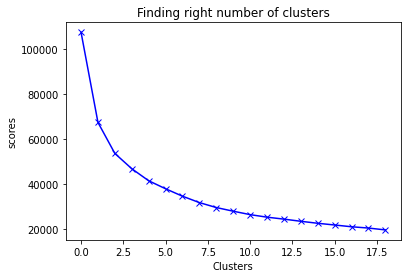

In [ ]:
# k-means 알고리즘을 적용하기 전에 군집들이 얼마나 있는지 보자
scores_2 = []
for i in range_values:
   kmeans = KMeans(n_clusters=i)
   kmeans.fit(pred)
   scores_2.append(kmeans.inertia_) # inertia_는 군집 내 제곱 합을 의미한다.

# 군집 내 제곱 합과 군집의 수 K를 플롯하는 것.
plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

# k-평균을 적용해 최적의 군집 수를 구하기  > elbow메소드를 적용해 최적의 군집 수를 찾아낸다.

# 주성분 분석(PCA)을 적용해 결과를 시각화 해보기.


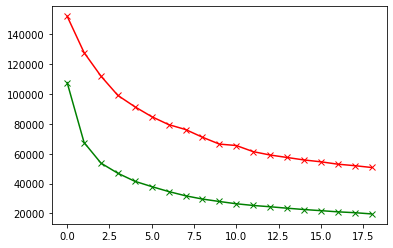

In [ ]:
plt.plot(scores_1, 'bx-', color = 'r') # 군집을 8개 이용했었음
plt.plot(scores_2, 'bx-', color = 'g') # 4 or 5

In [ ]:
kmeans = KMeans(4) # 전 보다 적은 군집 수인 4를 택함.
kmeans.fit(pred)
labels = kmeans.labels_


In [ ]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
 # 주성분 분석을 적용 PCA
 pca = PCA(n_components = 2)
 prin_comp = pca.fit_transform(pred)
 pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])

In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis =1)
pca_df.head()

,pca1,pca2,cluster
0,-1.985077,-0.061913,0
1,0.294169,1.623275,2
2,1.362291,-0.438161,2
3,-2.205090,-0.221446,0
4,-2.012315,0.029304,0


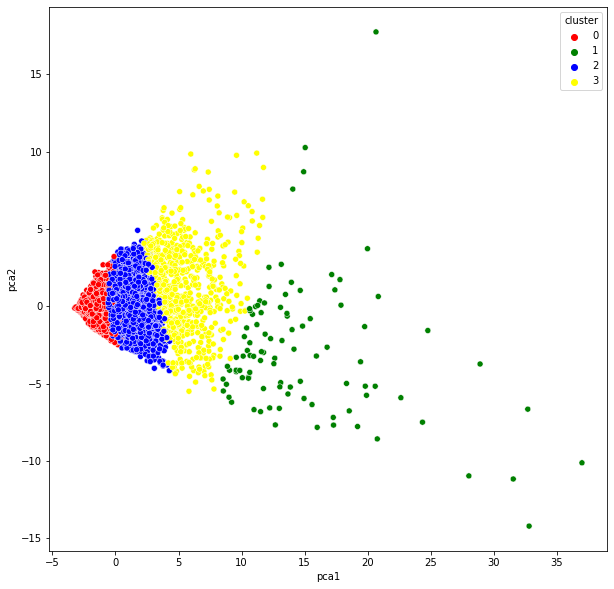

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette =['red','green','blue','yellow'])

In [ ]:
# 정리
# 17개의 특성으로 시작해서, 오토인코더(딥러닝)를 사용해, 10개의 특성으로 줄인 후
# K-mean 알고리즘을 적용해 군집화 작업을 수행 
# 주성분 분석(PCA)을 적용해, 2개의 성분으로 만들고(pca1, pca2)
# 4개의 군집으로 나누어 졌다.
# 고객 마케팅, 마켓 세그멘테이션 등을 위해 차원 축소를 수행하는 또 다른 방법.